In [ ]:
#making sure Python environment has the libraries that need before actually import and use them in code.
!pip install transformers
!pip install datasets
!pip install seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pandas numpy


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
#in case i want to work with directories or file paths later
import os


In [ ]:
# Dataset path
base_path = '/content/drive/My Drive/accuracy-drop-fake-news/datasets/'

#two DataFrames — fake and true,
fake = pd.read_csv(base_path + 'Fake.csv')
true = pd.read_csv(base_path + 'True.csv')


In [ ]:
## add labels
fake['label'] = 0
true['label'] = 1



In [ ]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
#Combines the two datasets vertically into one DataFrame
df = pd.concat([fake, true])
#only the relevant columns &Drops any missing (NaN) values.
df = df[['title', 'text', 'label']].dropna()
df.reset_index(drop=True, inplace=True)
df.head()


,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
data.sample(5)

NameError: name 'data' is not defined

In [ ]:
#Basic Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
#find the meanings of words, synonyms, antonyms, and more
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Lowercase + remove punctuation
    tokens = text.split()                        # Tokenize (split into words)
    tokens = [w for w in tokens if w not in stop_words]  # Remove stopwords
    return ' '.join(tokens)                      # Join words back into string


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)
#new column clean_text-applying the cleaning function to each article’s text

In [ ]:
df['label'].value_counts()

,count
label,
0,23481
1,21417


In [ ]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
#fit_transform() learns the vocabulary from clean_text and applies the TF-IDF calculation.
#X becomes a sparse matrix
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']



In [ ]:
#Now that you have X and y,ready to split the data and train a model:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#Importing Libraries:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# 1. Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [ ]:
# 2. Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [ ]:
# 3. Evaluate both
print("🔍 Naive Bayes Results:")
print(classification_report(y_test, nb_preds))

print("🔍 Logistic Regression Results:")
print(classification_report(y_test, lr_preds))


🔍 Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4733
           1       0.93      0.93      0.93      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

🔍 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



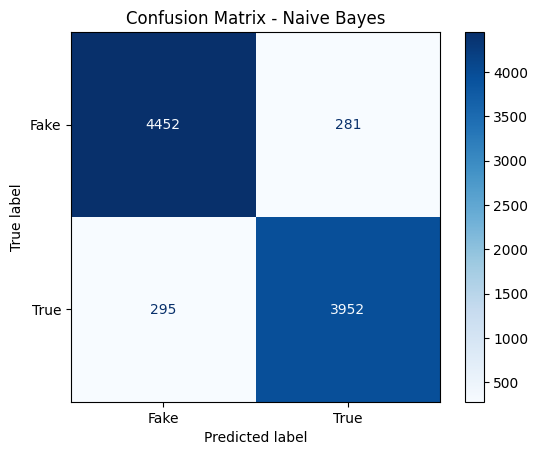

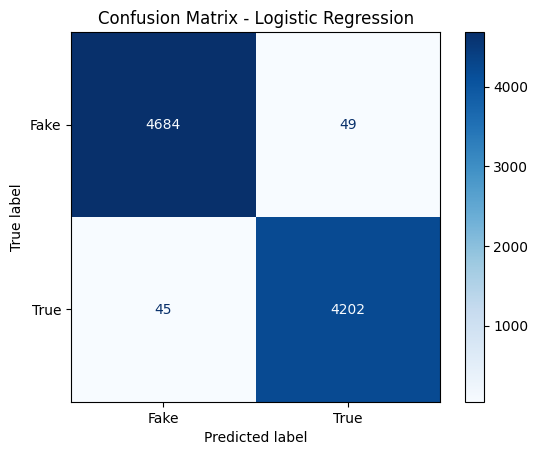

In [ ]:
"""confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_preds)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Fake', 'True'])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_preds)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Fake', 'True'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show() """


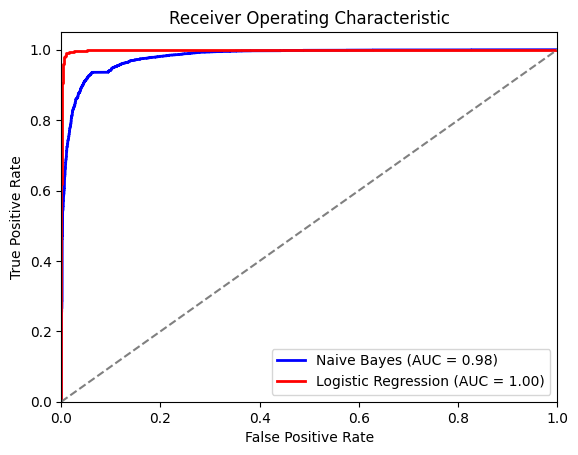

In [ ]:
#ROC Curve: Evaluate tradeoffs between precision and recall
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class
y_scores_nb = nb.predict_proba(X_test)[:, 1]
y_scores_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



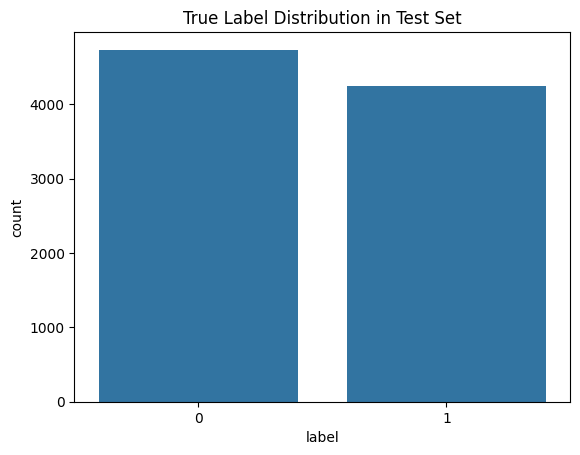

NameError: name 'y_pred' is not defined

In [ ]:
#Visualize Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_test)
plt.title("True Label Distribution in Test Set")
plt.show()

sns.countplot(x=y_pred)
plt.title("Predicted Label Distribution")
plt.show()


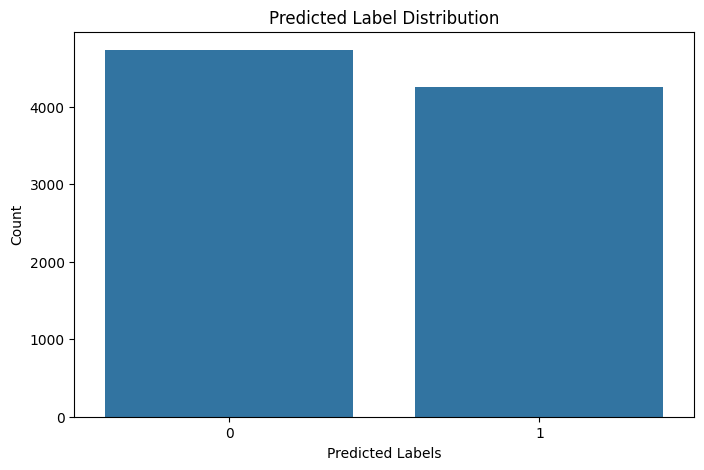

In [ ]:
# For Logistic Regression
y_pred = lr.predict(X_test)

# For Naive Bayes
# y_pred = nb.predict(X_test)

# create the count plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred)
plt.title("Predicted Label Distribution")
plt.xlabel("Predicted Labels")
plt.ylabel("Count")
plt.show()


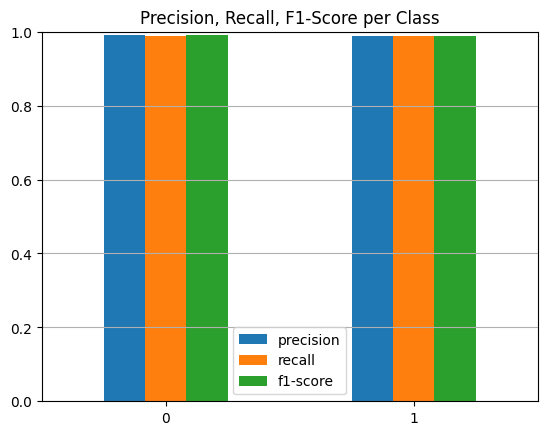

In [ ]:
#Precision vs. Recall Bar Chart
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].iloc[:2].plot(kind='bar', ylim=(0,1), legend=True)
plt.title("Precision, Recall, F1-Score per Class")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
